In [41]:
#step 1 - cargar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.impute import SimpleImputer



In [42]:
#cargar ds
url = "/workspaces/clases_4geeks/data_stuff/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,147,75,0,0,29.9,0.434,28,0
1,6,119,50,22,176,27.1,1.318,33,1
2,2,90,68,42,0,38.2,0.503,27,1
3,3,121,52,0,0,36.0,0.127,25,1
4,10,68,106,23,49,35.5,0.285,47,0


In [43]:
df_raw = df.copy()
#dimensiones
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               31 non-null     int64  
 1   Glucose                   31 non-null     int64  
 2   BloodPressure             31 non-null     int64  
 3   SkinThickness             31 non-null     int64  
 4   Insulin                   31 non-null     int64  
 5   BMI                       31 non-null     float64
 6   DiabetesPedigreeFunction  31 non-null     float64
 7   Age                       31 non-null     int64  
 8   Outcome                   31 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 2.3 KB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,31.0,3.419355,2.986349,0.000,1.500,3.000,5.0000,12.00
Glucose,31.0,121.387097,29.607068,68.000,100.500,121.000,140.5000,184.00
BloodPressure,31.0,67.161290,21.516036,0.000,62.000,70.000,78.0000,106.00
SkinThickness,31.0,21.967742,17.963823,0.000,0.000,23.000,36.0000,63.00
Insulin,31.0,131.161290,164.482845,0.000,0.000,65.000,232.5000,600.00
BMI,31.0,32.787097,8.233822,21.100,25.550,32.800,36.9500,59.40
DiabetesPedigreeFunction,31.0,0.521871,0.449352,0.078,0.256,0.434,0.6505,2.42
Age,31.0,29.387097,8.905719,21.000,23.000,27.000,31.5000,55.00
Outcome,31.0,0.354839,0.486373,0.000,0.000,0.000,1.0000,1.00


In [45]:
df_baking = df_raw.copy()
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               31 non-null     int64  
 1   Glucose                   31 non-null     int64  
 2   BloodPressure             31 non-null     int64  
 3   SkinThickness             31 non-null     int64  
 4   Insulin                   31 non-null     int64  
 5   BMI                       31 non-null     float64
 6   DiabetesPedigreeFunction  31 non-null     float64
 7   Age                       31 non-null     int64  
 8   Outcome                   31 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 2.3 KB


In [46]:
#revisar si hay duplicados para eliminarlos
df_baking = df_baking.drop_duplicates().reset_index(drop=True)
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               31 non-null     int64  
 1   Glucose                   31 non-null     int64  
 2   BloodPressure             31 non-null     int64  
 3   SkinThickness             31 non-null     int64  
 4   Insulin                   31 non-null     int64  
 5   BMI                       31 non-null     float64
 6   DiabetesPedigreeFunction  31 non-null     float64
 7   Age                       31 non-null     int64  
 8   Outcome                   31 non-null     int64  
dtypes: float64(2), int64(7)
memory usage: 2.3 KB


In [47]:

cols_con_ceros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_baking[cols_con_ceros] = df_baking[cols_con_ceros].replace(0, np.nan)

df_baking.fillna(df_baking.median(), inplace=True)


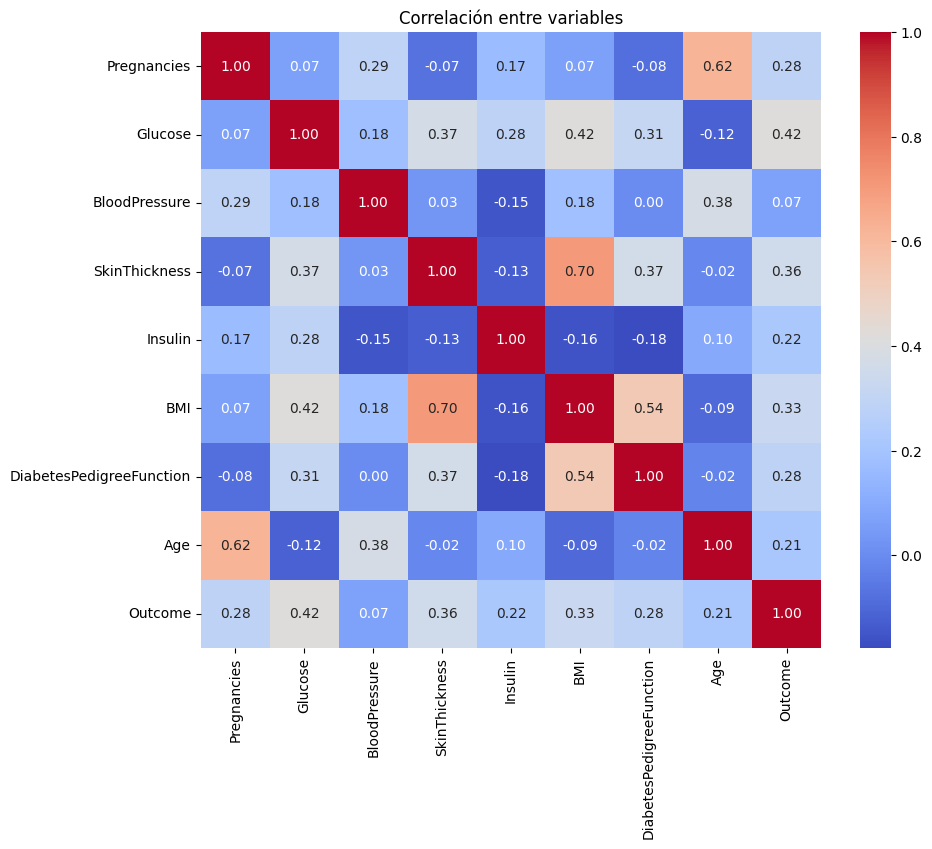

In [48]:
#EDA

plt.figure(figsize=(10, 8))
sns.heatmap(df_baking.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables')
plt.show()

In [50]:
X = df_baking.drop("Outcome", axis=1)
y = df_baking["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [56]:

model = RandomForestClassifier(n_estimators = 60, random_state = 42)
model.fit(X_train, y_train)

,n_estimators,60
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0])

In [58]:
accuracy_score(y_test, y_pred)

0.8571428571428571